In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aib_df=pd.read_csv("AB_NYC_2019.csv")
aib_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
print(f"Total Listings: {aib_df.shape[0]}")

Total Listings: 48895


In [6]:
print(f"No of unique hosts: {aib_df.value_counts("host_id").shape[0]}")

No of unique hosts: 37457


In [13]:
top_five_negihbourhood=aib_df.groupby("neighbourhood_group")["calculated_host_listings_count"].sum()
print(top_five_negihbourhood)

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64


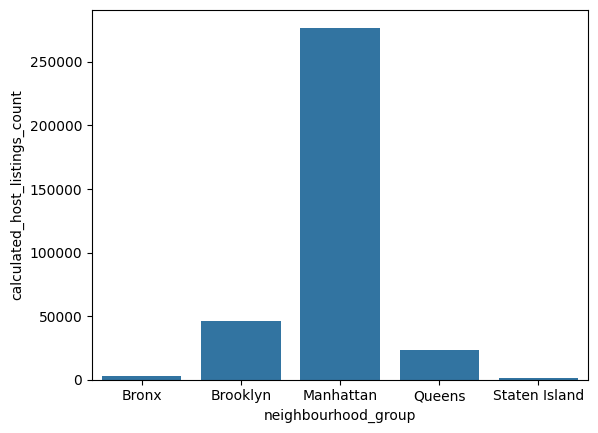

In [14]:
sns.barplot(top_five_negihbourhood)
plt.show()

In [15]:
expensive_listings=aib_df[["name","price","neighbourhood"]].sort_values(by="price",ascending=False).head(10)
expensive_listings

,name,price,neighbourhood
29238,1-BR Lincoln Center,10000,Upper West Side
9151,Furnished room in Astoria apartment,10000,Astoria
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000,Greenpoint
6530,Spanish Harlem Apt,9999,East Harlem
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999,Lower East Side
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999,Lower East Side
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500,Tribeca
4377,Film Location,8000,Clinton Hill
29662,East 72nd Townhouse by (Hidden by Airbnb),7703,Upper East Side
42523,70' Luxury MotorYacht on the Hudson,7500,Battery Park City


In [16]:
price_per_roomtype=aib_df.groupby("room_type")["price"].mean()
price_per_roomtype

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

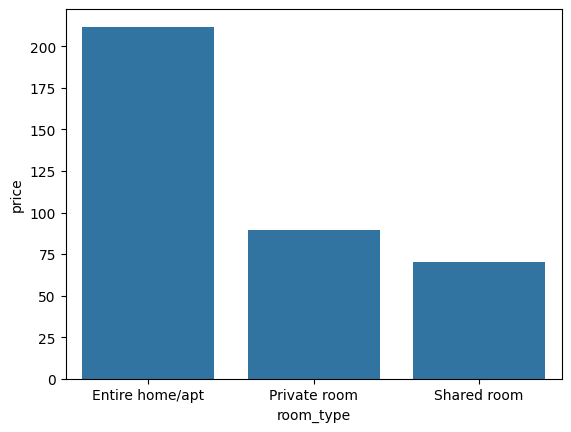

In [17]:
sns.barplot(price_per_roomtype)
plt.show()

In [19]:
neighbourhood_by_price=aib_df.groupby("neighbourhood")["price"].mean().head(10)
neighbourhood_by_price

neighbourhood
Allerton                       87.595238
Arden Heights                  67.250000
Arrochar                      115.000000
Arverne                       171.779221
Astoria                       117.187778
Bath Beach                     81.764706
Battery Park City             367.557143
Bay Ridge                     144.432624
Bay Terrace                   142.000000
Bay Terrace, Staten Island    102.500000
Name: price, dtype: float64

In [25]:
ultra_expensive_listing=aib_df.loc[aib_df["price"]>500,["name","neighbourhood","price"]]
ultra_expensive_listing

,name,neighbourhood,price
85,perfect for a family or small group,Brooklyn Heights,800
299,Unique spacious loft on the Bowery,Little Italy,575
345,The Brooklyn Waverly,Clinton Hill,650
365,2 BR w/ Terrace @ Box House Hotel,Greenpoint,599
496,Luxury 2Bed/2.5Bath Central Park View,Upper West Side,2000
...,...,...,...
48535,"Stunning & Stylish Brooklyn Luxury, near Train",Bedford-Stuyvesant,1749
48697,HUGE LUXURY CONDO – INCREDIBLE WATER VIEWS,Upper West Side,750
48740,Spacious 2BR in Beautiful Brooklyn Heights,Brooklyn Heights,550
48757,Luxury & Spacious 1500 ft² MANHATTAN Townhouse,Tribeca,700


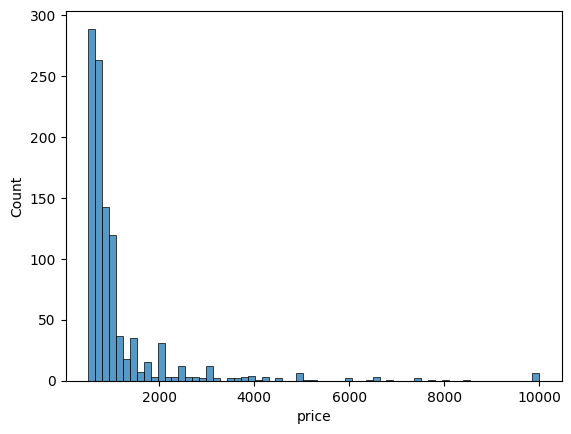

In [26]:
sns.histplot(ultra_expensive_listing["price"])
plt.show()

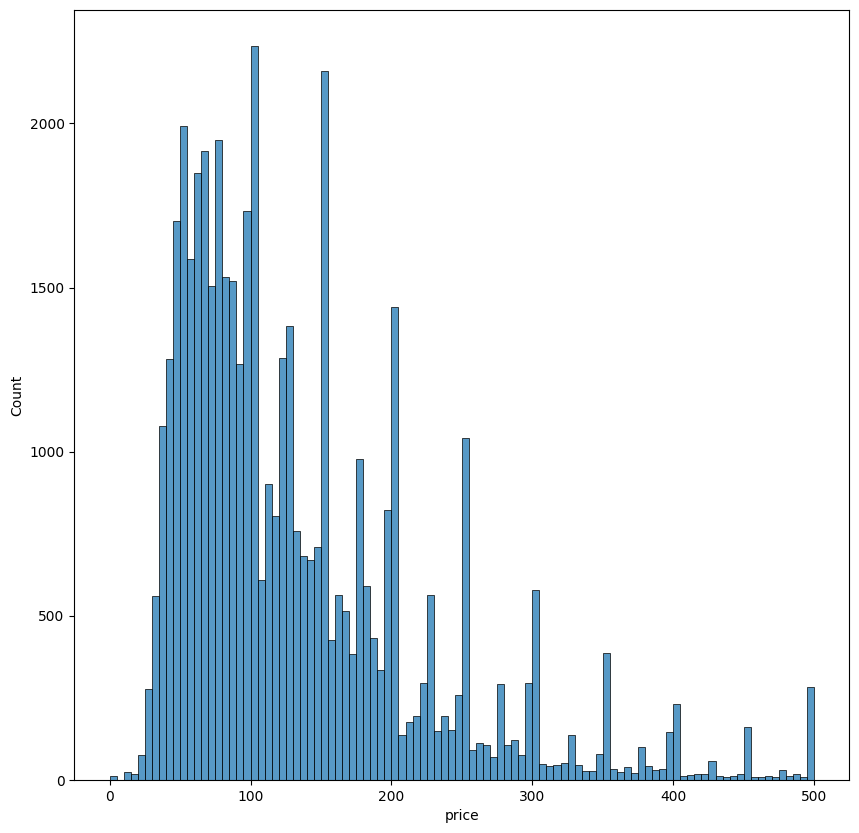

In [34]:
plt.figure(figsize=(10,10))
sns.histplot(aib_df["price"],bins=100,binrange=(0,500))
plt.show()

In [35]:
aib_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [42]:
highest_review_neighbourhood=aib_df.groupby("neighbourhood_group")["number_of_reviews"].sum()
print(highest_review_neighbourhood.idxmax())

Brooklyn


In [44]:
full_year_availabilty=aib_df.loc[aib_df["availability_365"]==365,["name","neighbourhood","availability_365"]]
full_year_availabilty

,name,neighbourhood,availability_365
0,Clean & quiet apt home by the park,Kensington,365
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,365
36,Clean and Quiet in Brooklyn,Bedford-Stuyvesant,365
38,Country space in the city,Flatbush,365
97,"Upper Manhattan, New York",Harlem,365
...,...,...,...
48744,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,Williamsburg,365
48844,West Village Studio on quiet cobblestone street,West Village,365
48868,Heaven for you(only for guy),Gravesend,365
48880,The Raccoon Artist Studio in Williamsburg New ...,Williamsburg,365


In [49]:
host_listings=aib_df.groupby(["host_name"])["calculated_host_listings_count"].sum()
print(f"Host with most listing: {host_listings.idxmax()}")

Host with most listing: Sonder (NYC)


In [52]:
avg_price_per_neighbourhood=aib_df.groupby("neighbourhood")["price"].mean().reset_index(name="Average price")
avg_price_per_neighbourhood

,neighbourhood,Average price
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,171.779221
4,Astoria,117.187778
...,...,...
216,Windsor Terrace,138.993631
217,Woodhaven,67.170455
218,Woodlawn,60.090909
219,Woodrow,700.000000


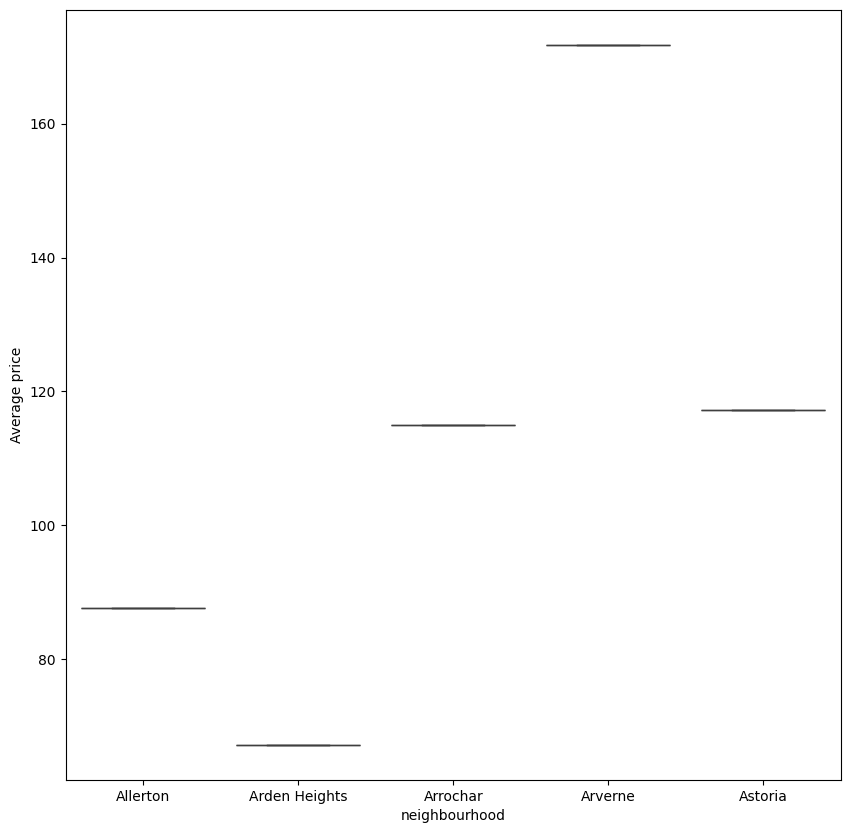

In [57]:
plt.figure(figsize=(10,10))
sns.boxplot(data=avg_price_per_neighbourhood.head(5),x="neighbourhood",y="Average price")
plt.show()

In [59]:
corr_price_review=aib_df[["price","number_of_reviews"]].corr()
corr_price_review

,price,number_of_reviews
price,1.000000,-0.047954
number_of_reviews,-0.047954,1.000000


In [60]:
aib_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [73]:
room_type_total=aib_df.value_counts("room_type").reset_index(name="total_listings")
room_type_total

,room_type,total_listings
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


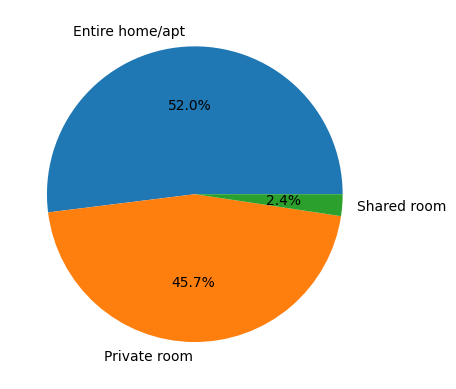

In [75]:
plt.pie(data=room_type_total,labels="room_type",x="total_listings",autopct="%.1f%%")
plt.show()

In [77]:
max_night_required=aib_df.loc[aib_df["minimum_nights"].max(),["name","neighbourhood","minimum_nights"]]
max_night_required

name              Sunny 2 Bedroom Duplex with Garden
neighbourhood                     Bedford-Stuyvesant
minimum_nights                                     3
Name: 1250, dtype: object

In [78]:
min_night_required=aib_df.loc[aib_df["minimum_nights"].min(),["name","neighbourhood","minimum_nights"]]
min_night_required

name              Skylit Midtown Castle
neighbourhood                   Midtown
minimum_nights                        1
Name: 1, dtype: object